In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
from sklearn.tree import export_graphviz 
import warnings
warnings.filterwarnings('ignore')

# Business Problem
A cloth manufacturing company is interested to know about the segments or attributes cause high sale.

# Data collection

In [2]:
cd = pd.read_csv("C://Users//Dell//Downloads//Company_Data.csv",encoding = 'latin 1')
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
cd1 = cd.copy()

In [4]:
cd1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
cd1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
cd1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
cd1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
cd1.shape

(400, 11)

# Outlier Check

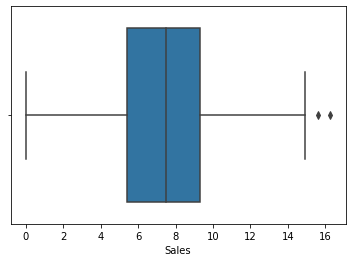

In [9]:
ax = sn.boxplot(cd1['Sales'])

# The data has 2 outliers

In [10]:
plot.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


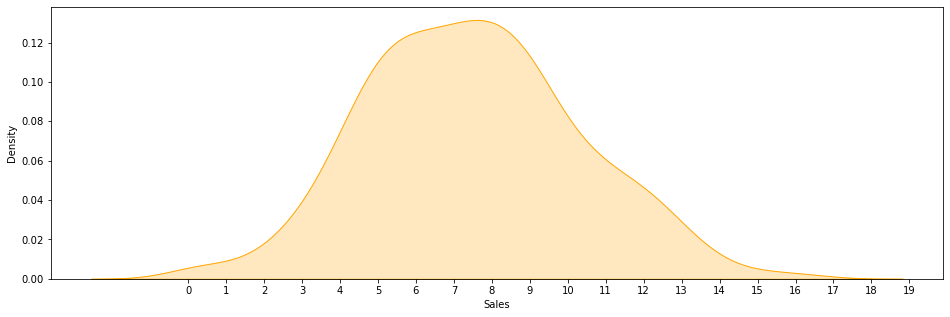

In [11]:
plot.figure(figsize = (16,5))
print("Skew: {}".format(cd1['Sales'].skew()))
print("Kurtosis: {}".format(cd1['Sales'].kurtosis()))
ax = sn.kdeplot(cd1['Sales'],shade = True,color = 'Orange')
plot.xticks([i for i in range(0,20,1)])
plot.show()

# The data is Skewed on the right side
# The data has negative Kurtosis.

In [12]:
obj_colum = cd1.select_dtypes(include = 'object').columns.tolist()

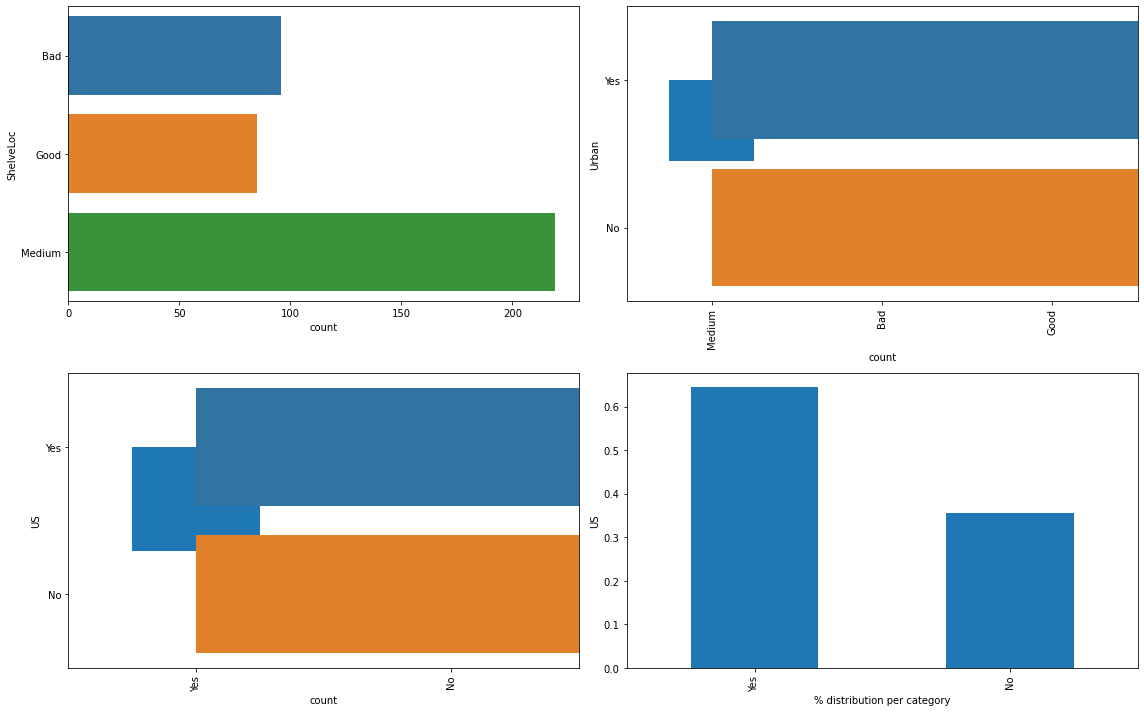

In [13]:
plot.figure(figsize = (16,10))
for i,col in enumerate(obj_colum,1):
    plot.subplot(2,2,i)
    sn.countplot(data = cd1,y = col)
    plot.subplot(2,2,i+1)
    cd1[col].value_counts(normalize = True).plot.bar()
    plot.ylabel(col)
    plot.xlabel('% distribution per category')
plot.tight_layout()
plot.show()  

In [14]:
num_columns = cd1.select_dtypes(exclude = 'object').columns.tolist()

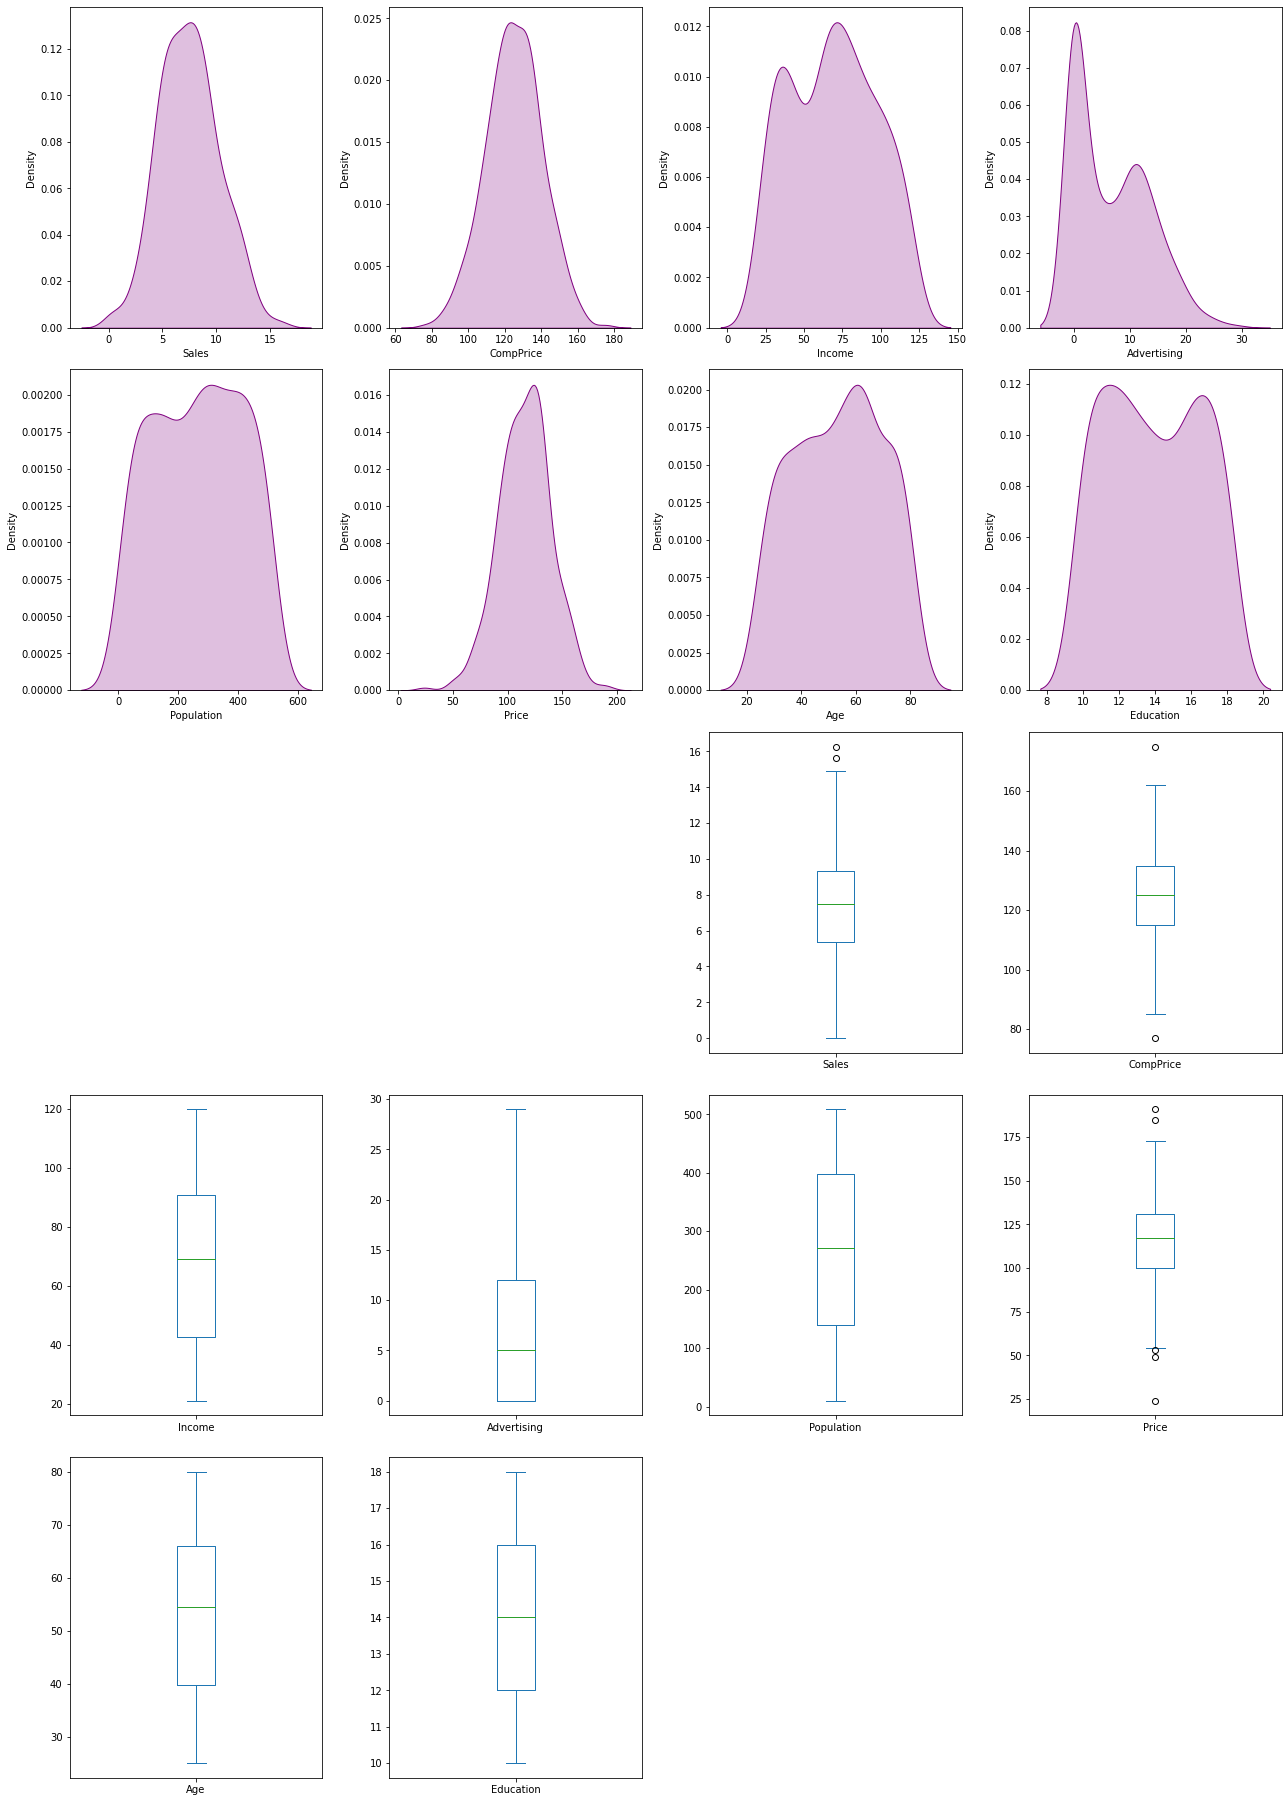

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [15]:
plot.figure(figsize = (18,40))
for i,col in enumerate(num_columns,1):
    plot.subplot(8,4,i)
    sn.kdeplot(cd[col],color = 'purple',shade = True)
    plot.subplot(8,4,i+10)
    cd[col].plot.box()
plot.tight_layout() 
plot.show()
num_data = cd[num_columns]
pd.DataFrame(data = [num_data.skew(),num_data.kurtosis()],index = ['skewness','kurtosis'])

In [16]:
corr = cd1.corr()

In [17]:
cd1 = pd.get_dummies(cd1, columns = ['ShelveLoc','Urban','US'])

In [18]:
corr = cd1.corr()

<AxesSubplot:>

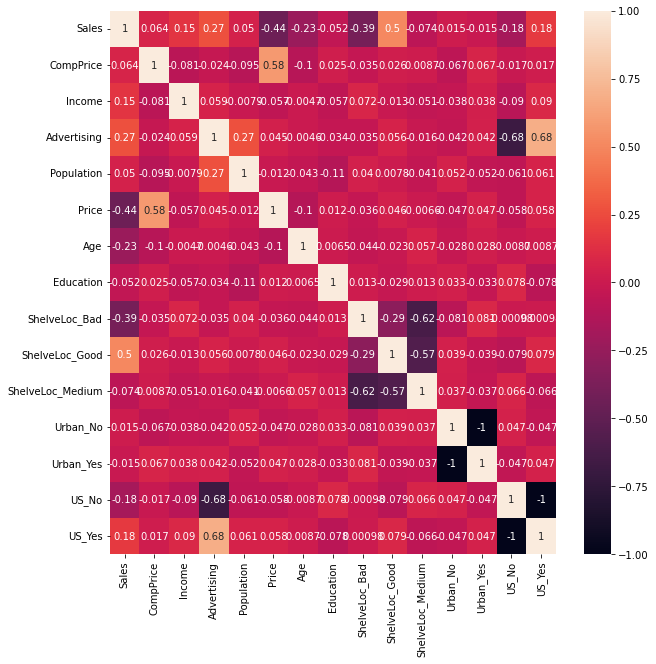

In [19]:
plot.figure(figsize = (10,10))
sn.heatmap(corr,annot = True)

# Decision Tree - Model

# Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [20]:
cd1["sales"] = "small"
cd1.loc[cd1["Sales"] > 7.49,"sales"] = "large"
cd1.drop(["Sales"],axis = 1,inplace = True)

In [21]:
X = cd1.iloc[:,0:14]
y = cd1.iloc[:,14]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [23]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [24]:
model = DT(criterion = 'entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
pred_train = model.predict(x_train)

In [26]:
accuracy_score(y_train,pred_train)

1.0

In [27]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [28]:
pred_test = model.predict(x_test)

In [29]:
accuracy_score(y_test,pred_test)

0.6875

In [30]:
confusion_matrix(y_test,pred_test)

array([[26, 14],
       [11, 29]], dtype=int64)

In [31]:
cd_t = pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [32]:
cd_t

,Actual,Predicted
197,small,small
307,small,small
344,large,large
132,large,small
246,small,large
...,...,...
88,small,small
274,small,small
156,small,large
33,large,large


In [33]:
cols = list(cd1.columns)

In [34]:
predictors = cols[0:14]
target = cols[14]

In [35]:
dot_data = StringIO()

In [36]:
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, feature_names = predictors,class_names = target, impurity = False )

In [37]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Inference
1. Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 70%.
2. As seen in the confusion matrix of Test data 56 instances are correct and 24 instances are not.

In [38]:
img = mpimg.imread(r'C:\\Users\\Dell\\Downloads\\company_full.png') 

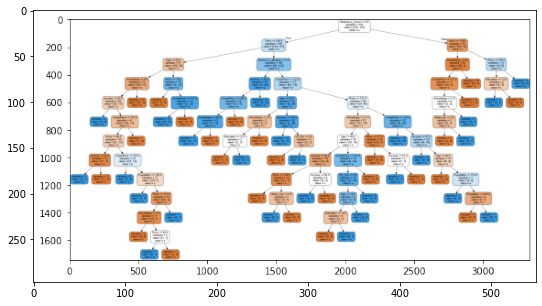

In [39]:
plot.imshow(img)

In [40]:
model.feature_importances_

array([0.20856739, 0.10547044, 0.07603631, 0.06573362, 0.29907351,
       0.06714098, 0.05571317, 0.00625018, 0.08767685, 0.        ,
       0.02833755, 0.        , 0.        , 0.        ])

In [41]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [42]:
fi

,feature,importance
4,Price,0.299074
0,CompPrice,0.208567
1,Income,0.105470
8,ShelveLoc_Good,0.087677
2,Advertising,0.076036
5,Age,0.067141
3,Population,0.065734
6,Education,0.055713
10,Urban_No,0.028338
7,ShelveLoc_Bad,0.006250


# As seen in the above table Price is most important feature.